# 최적의 ensemble 모델 찾기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,451 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: fall

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import plot_importance as xgb_plot_importance
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from lightgbm import plot_metric, plot_importance, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import mean_squared_error
def get_rmse_pred(y_test, pred):
  mse=mean_squared_error(y_test, pred)
  rmse=np.sqrt(mse)
  return rmse

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_loc=pd.read_csv("/content/drive/MyDrive/멀캠_1st_semiproject/전세_최종_데이터.csv")
df_loc.drop('전용면적(㎡)', axis=1, inplace=True)
df_loc

,보증금(만원),층,건축년도,home_cnt,home_size,room_cnt,bath_cnt,edu,bus,sub_dist,...,"('서초구',)","('성북구',)","('송파구',)","('양천구',)","('영등포구',)","('용산구',)","('은평구',)","('종로구',)","('중구',)","('중랑구',)"
0,40000.0,5,1988,54,77.75,3,1,1,1,0.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50000.0,2,1988,54,77.75,3,1,1,1,0.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50000.0,6,1988,54,77.75,3,1,1,1,0.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49000.0,3,1988,54,77.75,3,1,1,1,0.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50000.0,9,1988,54,77.75,3,1,1,1,0.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521240,33500.0,10,2021,44,29.02,1,1,0,0,0.47,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521241,33500.0,8,2021,44,29.02,1,1,0,1,3.56,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521242,33500.0,8,2021,44,29.02,1,1,0,0,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521243,33500.0,8,2021,44,29.02,1,1,0,0,0.95,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# sklearn.feature_selection.RFE를 이용해 feature를 선택 가능!
# n_features_to_select를 1로 주면 순위를 확인할 수 있음(by feature_importance)
# 즉, feature_importance를 직접 보고 필요없는 변수를 빼도 됨!
# feature_importance를 이용해 판단할 때 확실하게 주어지는 임계값은 없음.

In [ ]:
columns=df_loc.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
X=pd.DataFrame(mms.fit_transform(df_loc.iloc[:, 1:]), columns=columns[1:])

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(
    X, df_loc.iloc[:,0], test_size=0.2)

## LGBMRegressor 최적 hyperparameter 찾기

In [ ]:
lgb=LGBMRegressor(random_state=2022)
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 2022,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
param_grid = {
    'num_leaves': [10,30,50],
    'reg_alpha': [0.1,0.3,0.5],
    'min_data_in_leaf': [30, 50, 100],
    }
grid_lgb=GridSearchCV(lgb, param_grid, cv=5)
grid_lgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2022),
             param_grid={'min_data_in_leaf': [30, 50, 100],
                         'num_leaves': [10, 30, 50],
                         'reg_alpha': [0.1, 0.3, 0.5]})

In [ ]:
grid_lgb.best_params_

{'min_data_in_leaf': 30, 'num_leaves': 50, 'reg_alpha': 0.5}

In [ ]:
param_grid = {
    'num_leaves': [40,45,50,55,60],
    'reg_alpha': [0.4,0.5,0.6,0.7],
    'min_data_in_leaf': [20,30,40,50],
    }
grid_lgb=GridSearchCV(lgb, param_grid, cv=5)
grid_lgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2022),
             param_grid={'min_data_in_leaf': [20, 30, 40, 50],
                         'num_leaves': [40, 45, 50, 55, 60],
                         'reg_alpha': [0.4, 0.5, 0.6, 0.7]})

In [ ]:
grid_lgb.best_params_

{'min_data_in_leaf': 20, 'num_leaves': 60, 'reg_alpha': 0.7}

In [ ]:
param_grid = {
    'num_leaves': [50,60,70,80,90,100],
    'reg_alpha': [0.6,0.7,0.8,0.9,1.0],
    'min_data_in_leaf': [10,15,20,25],
    }
grid_lgb=GridSearchCV(lgb, param_grid, cv=5)
grid_lgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2022),
             param_grid={'min_data_in_leaf': [10, 15, 20, 25],
                         'num_leaves': [50, 60, 70, 80, 90, 100],
                         'reg_alpha': [0.6, 0.7, 0.8, 0.9, 1.0]})

In [ ]:
grid_lgb.best_params_  # 'reg_alpha': 0.7 

{'min_data_in_leaf': 15, 'num_leaves': 100, 'reg_alpha': 0.7}

In [ ]:
param_grid = {
    'num_leaves': [90,100,110,120],
    'min_data_in_leaf': [13,14,15,16,17],
    }
grid_lgb=GridSearchCV(lgb, param_grid, cv=5)
grid_lgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2022),
             param_grid={'min_data_in_leaf': [13, 14, 15, 16, 17],
                         'num_leaves': [90, 100, 110, 120]})

In [ ]:
grid_lgb.best_params_

{'min_data_in_leaf': 13, 'num_leaves': 120}

In [ ]:
param_grid = {
    'num_leaves': [120,130,140,150,160],
    'min_data_in_leaf': [9,10,11,12,13],
    }
grid_lgb=GridSearchCV(lgb, param_grid, cv=5)
grid_lgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2022),
             param_grid={'min_data_in_leaf': [9, 10, 11, 12, 13],
                         'num_leaves': [120, 130, 140, 150, 160]})

In [ ]:
grid_lgb.best_params_

{'min_data_in_leaf': 9, 'num_leaves': 160}

In [ ]:
param_grid = {
    'num_leaves': [160,170,180,190,200],
    'min_data_in_leaf': [5,6,7,8,9],
}
grid_lgb=GridSearchCV(lgb, param_grid, cv=5)
grid_lgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2022),
             param_grid={',num_leaves': [160, 170, 180, 190, 200],
                         'min_data_in_leaf': [5, 6, 7, 8, 9]})

## 최적 hyperparameter을 이용한 LGBMRegressor 모델 생성

In [ ]:
lgb=LGBMRegressor(num_leaves=160, min_data_in_leaf=9, reg_alpha=0.7, random_state=2022)

evals=[(X_test, y_test)] 

lgb.fit(X_train, y_train, eval_set=evals, eval_metric='logloss') 
lgb.score(X_test, y_test)

[1]	valid_0's l2: 6.13534e+08
[2]	valid_0's l2: 5.265e+08
[3]	valid_0's l2: 4.55234e+08
[4]	valid_0's l2: 3.97245e+08
[5]	valid_0's l2: 3.50445e+08
[6]	valid_0's l2: 3.11656e+08
[7]	valid_0's l2: 2.79853e+08
[8]	valid_0's l2: 2.53731e+08
[9]	valid_0's l2: 2.32462e+08
[10]	valid_0's l2: 2.14563e+08
[11]	valid_0's l2: 1.99986e+08
[12]	valid_0's l2: 1.87939e+08
[13]	valid_0's l2: 1.77814e+08
[14]	valid_0's l2: 1.6938e+08
[15]	valid_0's l2: 1.62062e+08
[16]	valid_0's l2: 1.56047e+08
[17]	valid_0's l2: 1.51094e+08
[18]	valid_0's l2: 1.46936e+08
[19]	valid_0's l2: 1.43308e+08
[20]	valid_0's l2: 1.40413e+08
[21]	valid_0's l2: 1.37799e+08
[22]	valid_0's l2: 1.35542e+08
[23]	valid_0's l2: 1.33633e+08
[24]	valid_0's l2: 1.31926e+08
[25]	valid_0's l2: 1.30466e+08
[26]	valid_0's l2: 1.2921e+08
[27]	valid_0's l2: 1.28172e+08
[28]	valid_0's l2: 1.27218e+08
[29]	valid_0's l2: 1.26382e+08
[30]	valid_0's l2: 1.25655e+08
[31]	valid_0's l2: 1.24988e+08
[32]	valid_0's l2: 1.24459e+08
[33]	valid_0's l2: 1.

0.8414983897223707

## XGBRegressor의 최적 hyperparameter 찾기

In [ ]:
xgb=XGBRegressor()

In [ ]:
parameters = {'learning_rate': [0.03, 0.05, 0.07], #so called `eta` value
              'max_depth': [1,50,100]}

grid_xgb=GridSearchCV(xgb, parameters, cv=5)
grid_xgb.fit(X_train, y_train)

In [ ]:
grid_xgb.best_params_

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [ ]:
parameters = {'learning_rate': [0.02, 0.03, 0.04], #so called `eta` value
              'max_depth': [40,50,60]}

grid_xgb=GridSearchCV(xgb, parameters, cv=5)
grid_xgb.fit(X_train, y_train)

In [ ]:
grid_xgb.best_params_  # learning_rate==0.04

{'learning_rate': 0.04, 'max_depth': 60}

In [ ]:
parameters = {'learning_rate': [0.04], #so called `eta` value
              'max_depth': [50,60,70,80]}

grid_xgb=GridSearchCV(xgb, parameters, cv=5)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [ ]:
grid_xgb.best_params_

{'learning_rate': 0.04, 'max_depth': 50}

In [ ]:
parameters = {'learning_rate': [0.04], #so called `eta` value
              'max_depth': [45,50,55,60]}

grid_xgb=GridSearchCV(xgb, parameters, cv=5)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,


In [ ]:
grid_xgb.best_params_

{'learning_rate': 0.04, 'max_depth': 50}

## 최적 hyperparameter을 이용한 XGBRegressor 모델 생성

In [ ]:
best_xgb=grid_xgb.best_estimator_

In [ ]:
xgb=XGBRegressor(learning_rate=0.04, max_depth=50)
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

[01:21:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8296038919248173

## LGBMRegressor 모델과 XGBRegressor 모델의 혼합 모델 생성

In [4]:
from sklearn.base import BaseEstimator

# lgb_score=lgb.score(X_test, y_test)  # 0.8438290828829523
# xgb_score=xgb.score(X_test, y_test)  # 0.8310373398181489

# weight_lgb=lgb_score/(lgb_score+xgb_score) 
# weight_xgb=xgb_score/(lgb_score+xgb_score)

class Mixed_regressor(BaseEstimator): 
  def __init__(self):
    self.xgb=XGBRegressor(learning_rate=0.04, max_depth=50)
    self.lgb=LGBMRegressor(num_leaves=160, min_data_in_leaf=9, reg_alpha=0.7, random_state=2022)
    self.weight_lgb= 0.8438290828829523/(0.8438290828829523+0.8310373398181489)
    self.weight_xgb= 0.8310373398181489/(0.8438290828829523+0.8310373398181489)

  def fit(self, X_train, y_train, X_test, y_test):      
    evals=[(X_test, y_test)] 
    self.lgb.fit(X_train, y_train, eval_set=evals, eval_metric='logloss')
    self.xgb.fit(X_train, y_train)

  def predict(self, X):
    pred=self.weight_lgb*self.lgb.predict(X)+self.weight_xgb*self.xgb.predict(X)
    return pred


In [5]:
dir(Mixed_regressor)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'fit',
 'get_params',
 'predict',
 'set_params']

In [22]:
mixed=Mixed_regressor()
mixed.fit(X_train, y_train, X_test, y_test)


[1]	valid_0's l2: 6.00649e+08
[2]	valid_0's l2: 5.15652e+08
[3]	valid_0's l2: 4.45803e+08
[4]	valid_0's l2: 3.89133e+08
[5]	valid_0's l2: 3.42667e+08
[6]	valid_0's l2: 3.046e+08
[7]	valid_0's l2: 2.73105e+08
[8]	valid_0's l2: 2.47288e+08
[9]	valid_0's l2: 2.26003e+08
[10]	valid_0's l2: 2.0864e+08
[11]	valid_0's l2: 1.94077e+08
[12]	valid_0's l2: 1.82172e+08
[13]	valid_0's l2: 1.72012e+08
[14]	valid_0's l2: 1.63651e+08
[15]	valid_0's l2: 1.56451e+08
[16]	valid_0's l2: 1.50684e+08
[17]	valid_0's l2: 1.45595e+08
[18]	valid_0's l2: 1.41051e+08
[19]	valid_0's l2: 1.37333e+08
[20]	valid_0's l2: 1.34221e+08
[21]	valid_0's l2: 1.31816e+08
[22]	valid_0's l2: 1.29514e+08
[23]	valid_0's l2: 1.27653e+08
[24]	valid_0's l2: 1.25965e+08
[25]	valid_0's l2: 1.24411e+08
[26]	valid_0's l2: 1.23155e+08
[27]	valid_0's l2: 1.21992e+08
[28]	valid_0's l2: 1.2111e+08
[29]	valid_0's l2: 1.20329e+08
[30]	valid_0's l2: 1.19572e+08
[31]	valid_0's l2: 1.18971e+08
[32]	valid_0's l2: 1.18333e+08
[33]	valid_0's l2: 1.

In [2]:
# 모델 추출 코드
import pickle
import joblib
joblib.dump(mixed, '/content/drive/MyDrive/멀캠_1st_semiproject/predict_house_price.pkl') 

NameError: ignored

In [ ]:
pred_mix=mixed.predict(X_test)
pred_lgb=lgb.predict(X_test)
pred_xgb=xgb.predict(X_test)
mix_rmse=get_rmse_pred(y_test, pred_mix) 
xgb_rmse=get_rmse_pred(y_test, pred_xgb) 
lgb_rmse=get_rmse_pred(y_test, pred_lgb) 

## center_weight과 sub_dist가 없는 데이터셋 만들고 위의 모델로 분석

In [ ]:
df_loc.columns

Index(['보증금(만원)', '층', '건축년도', 'home_cnt', 'home_size', 'room_cnt', 'bath_cnt',
       'edu', 'bus', 'sub_dist', '1호선', '2호선', '3호선', '4호선', '5호선', '6호선',
       '7호선', '8호선', '9호선', '살인 검거율', '강도 검거율', '강간,추행 검거율', '절도 검거율',
       '폭력 검거율', '인구 십만명당 살인발생', '인구 십만명당 강도발생', '인구 십만명당 강간,추행발생',
       '인구 십만명당 절도발생', '인구 십만명당 폭력발생', 'park', 'han_park', 'center_weight',
       'rate', '('강남구',)', '('강북구',)', '('강서구',)', '('관악구',)', '('광진구',)',
       '('구로구',)', '('금천구',)', '('노원구',)', '('도봉구',)', '('동대문구',)', '('동작구',)',
       '('마포구',)', '('서대문구',)', '('서초구',)', '('성북구',)', '('송파구',)', '('양천구',)',
       '('영등포구',)', '('용산구',)', '('은평구',)', '('종로구',)', '('중구',)', '('중랑구',)'],
      dtype='object')

In [ ]:
df_drop=df_loc.copy()
df_drop=df_drop.drop(['sub_dist', '1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', 'center_weight'], axis=1)
df_drop

,보증금(만원),층,건축년도,home_cnt,home_size,room_cnt,bath_cnt,edu,bus,살인 검거율,...,"('서초구',)","('성북구',)","('송파구',)","('양천구',)","('영등포구',)","('용산구',)","('은평구',)","('종로구',)","('중구',)","('중랑구',)"
0,40000.0,5,1988,54,77.75,3,1,1,1,0.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50000.0,2,1988,54,77.75,3,1,1,1,0.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50000.0,6,1988,54,77.75,3,1,1,1,0.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49000.0,3,1988,54,77.75,3,1,1,1,0.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50000.0,9,1988,54,77.75,3,1,1,1,0.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521240,33500.0,10,2021,44,29.02,1,1,0,0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521241,33500.0,8,2021,44,29.02,1,1,0,1,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521242,33500.0,8,2021,44,29.02,1,1,0,0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521243,33500.0,8,2021,44,29.02,1,1,0,0,1.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns2=df_drop.columns
mms=MinMaxScaler()
X2=pd.DataFrame(mms.fit_transform(df_drop.iloc[:, 1:]), columns=columns2[1:])
X_train2, X_test2, y_train2, y_test2=train_test_split(
    X2, df_drop.iloc[:,0], test_size=0.2)

In [ ]:
lgb_drop=LGBMRegressor(num_leaves=160, min_data_in_leaf=9, reg_alpha=0.7, random_state=2022)

evals=[(X_test2, y_test2)] 

lgb_drop.fit(X_train2, y_train2, eval_set=evals, eval_metric='logloss') 
lgb_drop.score(X_test2, y_test2)

[1]	valid_0's l2: 6.13329e+08
[2]	valid_0's l2: 5.27381e+08
[3]	valid_0's l2: 4.5756e+08
[4]	valid_0's l2: 4.00612e+08
[5]	valid_0's l2: 3.54353e+08
[6]	valid_0's l2: 3.16327e+08
[7]	valid_0's l2: 2.84597e+08
[8]	valid_0's l2: 2.59056e+08
[9]	valid_0's l2: 2.37795e+08
[10]	valid_0's l2: 2.19911e+08
[11]	valid_0's l2: 2.05141e+08
[12]	valid_0's l2: 1.93071e+08
[13]	valid_0's l2: 1.8289e+08
[14]	valid_0's l2: 1.74113e+08
[15]	valid_0's l2: 1.67045e+08
[16]	valid_0's l2: 1.61093e+08
[17]	valid_0's l2: 1.56069e+08
[18]	valid_0's l2: 1.51739e+08
[19]	valid_0's l2: 1.48042e+08
[20]	valid_0's l2: 1.44869e+08
[21]	valid_0's l2: 1.42221e+08
[22]	valid_0's l2: 1.39871e+08
[23]	valid_0's l2: 1.37905e+08
[24]	valid_0's l2: 1.36118e+08
[25]	valid_0's l2: 1.34623e+08
[26]	valid_0's l2: 1.3316e+08
[27]	valid_0's l2: 1.32053e+08
[28]	valid_0's l2: 1.30943e+08
[29]	valid_0's l2: 1.29965e+08
[30]	valid_0's l2: 1.29143e+08
[31]	valid_0's l2: 1.28457e+08
[32]	valid_0's l2: 1.2779e+08
[33]	valid_0's l2: 1.

0.8394874138564283

In [ ]:
xgb_drop=XGBRegressor(learning_rate=0.04, max_depth=50)
xgb_drop.fit(X_train2, y_train2)
xgb_drop.score(X_test2, y_test2)

[02:47:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8264945456977677

In [ ]:
mixed_drop=Mixed_regressor()
mixed_drop.fit(X_train2, y_train2, X_test2, y_test2)

[1]	valid_0's l2: 6.13329e+08
[2]	valid_0's l2: 5.27381e+08
[3]	valid_0's l2: 4.5756e+08
[4]	valid_0's l2: 4.00612e+08
[5]	valid_0's l2: 3.54353e+08
[6]	valid_0's l2: 3.16327e+08
[7]	valid_0's l2: 2.84597e+08
[8]	valid_0's l2: 2.59056e+08
[9]	valid_0's l2: 2.37795e+08
[10]	valid_0's l2: 2.19911e+08
[11]	valid_0's l2: 2.05141e+08
[12]	valid_0's l2: 1.93071e+08
[13]	valid_0's l2: 1.8289e+08
[14]	valid_0's l2: 1.74113e+08
[15]	valid_0's l2: 1.67045e+08
[16]	valid_0's l2: 1.61093e+08
[17]	valid_0's l2: 1.56069e+08
[18]	valid_0's l2: 1.51739e+08
[19]	valid_0's l2: 1.48042e+08
[20]	valid_0's l2: 1.44869e+08
[21]	valid_0's l2: 1.42221e+08
[22]	valid_0's l2: 1.39871e+08
[23]	valid_0's l2: 1.37905e+08
[24]	valid_0's l2: 1.36118e+08
[25]	valid_0's l2: 1.34623e+08
[26]	valid_0's l2: 1.3316e+08
[27]	valid_0's l2: 1.32053e+08
[28]	valid_0's l2: 1.30943e+08
[29]	valid_0's l2: 1.29965e+08
[30]	valid_0's l2: 1.29143e+08
[31]	valid_0's l2: 1.28457e+08
[32]	valid_0's l2: 1.2779e+08
[33]	valid_0's l2: 1.

In [ ]:
pred_mix_drop=mixed_drop.predict(X_test2)
pred_lgb_drop=lgb_drop.predict(X_test2)
pred_xgb_drop=xgb_drop.predict(X_test2)
mix_rmse_drop=get_rmse_pred(y_test2, pred_mix_drop) 
xgb_rmse_drop=get_rmse_pred(y_test2, pred_xgb_drop) 
lgb_rmse_drop=get_rmse_pred(y_test2, pred_lgb_drop) 

## 결과 비교 => center_weight과 sub_dist가 있을때와 없을때 비교

### rmse 비교

In [ ]:
print(f"xgb_rmse_drop : {xgb_rmse_drop}, lgb_rmse_drop : {lgb_rmse_drop}, mix_rmse_drop : {mix_rmse_drop}")

xgb_rmse_drop : 11169.264796896146, lgb_rmse_drop : 10742.925581512609, mix_rmse_drop : 10619.006763362608


In [ ]:
print(f"xgb_rmse : {xgb_rmse}, lgb_rmse : {lgb_rmse}, mix_rmse : {mix_rmse}")

xgb_rmse : 11083.515578255805, lgb_rmse : 10689.675944890078, mix_rmse : 10559.523376450397


### 없을때의 plot_importance 

<Figure size 36000x7200 with 0 Axes>

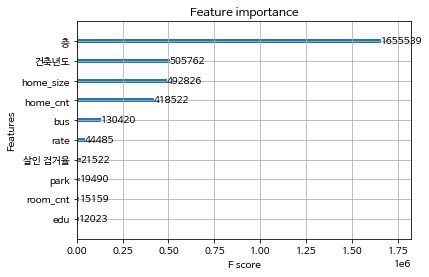

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(500,100))
xgb_plot_importance(xgb_drop, max_num_features=10)

<Figure size 36000x7200 with 0 Axes>

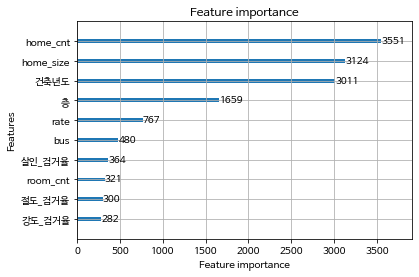

In [ ]:
plt.figure(figsize=(500,100))
plot_importance(lgb_drop, max_num_features=10);

### 있을때의 plot_importance

<Figure size 36000x7200 with 0 Axes>

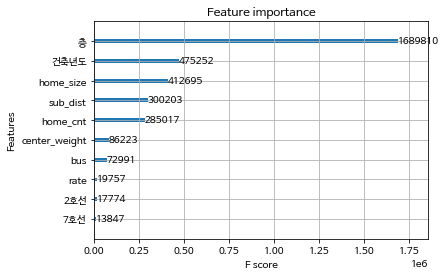

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(500,100))
xgb_plot_importance(xgb, max_num_features=10)

<Figure size 36000x7200 with 0 Axes>

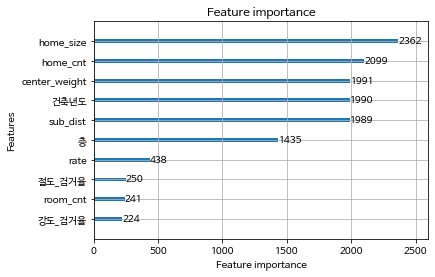

In [ ]:
plt.figure(figsize=(500,100))
plot_importance(lgb, max_num_features=10);

In [ ]:
# !jupyter nbconvert --to html /content/drive/MyDrive/멀캠_1st_semiproject/ensemble_모델링_작업.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/멀캠_1st_semiproject/ensemble_모델링_작업.ipynb to html
[NbConvertApp] Writing 474341 bytes to /content/drive/MyDrive/멀캠_1st_semiproject/ensemble_모델링_작업.html
